In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torchvision import models
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)
num_epochs = 5
batch_size = 40
learning_rate = 0.001
classes = ('plane', 'car' , 'bird',
    'cat', 'deer', 'dog',
    'frog', 'horse', 'ship', 'truck')

cuda


In [7]:
transform = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor(),
    transforms.Normalize( 
       (0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010) 
    )
])
train_dataset = torchvision.datasets.CIFAR10(
    root= './data', train = True,
    download =True, transform = transform)
test_dataset = torchvision.datasets.CIFAR10(
    root= './data', train = False,
    download =True, transform = transform)

Files already downloaded and verified
Files already downloaded and verified


In [8]:
train_loader = torch.utils.data.DataLoader(train_dataset
    , batch_size = batch_size
    , shuffle = True)
test_loader = torch.utils.data.DataLoader(test_dataset
    , batch_size = batch_size
    , shuffle = True)
n_total_step = len(train_loader)
print(n_total_step)

1250


In [9]:
model = models.vgg16(pretrained = True)
input_lastLayer = model.classifier[6].in_features
model.classifier[6] = nn.Linear(input_lastLayer,10)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate, momentum=0.9,weight_decay=5e-4)

In [10]:
for epoch in range(num_epochs):
  for i, (imgs , labels) in enumerate(train_loader):
    imgs = imgs.to(device)
    labels = labels.to(device)

    labels_hat = model(imgs)

    n_corrects = (labels_hat.argmax(axis=1)==labels).sum().item()

    loss_value = criterion(labels_hat, labels)
    loss_value.backward()

    optimizer.step()
    optimizer.zero_grad()
    if (i+1) % 25 == 0:
      print(f'epoch {epoch+1}/{num_epochs}, step: {i+1}/{n_total_step}: loss = {loss_value:.5f}, acc = {100*(n_corrects/labels.size(0)):.2f}%')
    #print()

epoch 1/5, step: 25/1250: loss = 1.04956, acc = 70.00%
epoch 1/5, step: 50/1250: loss = 0.77045, acc = 75.00%
epoch 1/5, step: 75/1250: loss = 0.75703, acc = 67.50%
epoch 1/5, step: 100/1250: loss = 0.66789, acc = 85.00%
epoch 1/5, step: 125/1250: loss = 0.56955, acc = 85.00%
epoch 1/5, step: 150/1250: loss = 0.48353, acc = 82.50%
epoch 1/5, step: 175/1250: loss = 0.71283, acc = 77.50%
epoch 1/5, step: 200/1250: loss = 0.42730, acc = 87.50%
epoch 1/5, step: 225/1250: loss = 0.41729, acc = 82.50%
epoch 1/5, step: 250/1250: loss = 0.16424, acc = 92.50%
epoch 1/5, step: 275/1250: loss = 0.55713, acc = 80.00%
epoch 1/5, step: 300/1250: loss = 0.59012, acc = 80.00%
epoch 1/5, step: 325/1250: loss = 0.34843, acc = 90.00%
epoch 1/5, step: 350/1250: loss = 0.31940, acc = 90.00%
epoch 1/5, step: 375/1250: loss = 0.32362, acc = 90.00%
epoch 1/5, step: 400/1250: loss = 0.43511, acc = 85.00%
epoch 1/5, step: 425/1250: loss = 0.46382, acc = 87.50%
epoch 1/5, step: 450/1250: loss = 0.47317, acc = 82

In [11]:
with torch.no_grad():
    number_corrects = 0
    number_samples = 0
    for i, (test_images_set , test_labels_set) in enumerate(test_loader):
        test_images_set = test_images_set.to(device)
        test_labels_set = test_labels_set.to(device)
    
        y_predicted = model(test_images_set)
        labels_predicted = y_predicted.argmax(axis = 1)
        number_corrects += (labels_predicted==test_labels_set).sum().item()
        number_samples += test_labels_set.size(0)
    print(f'Overall accuracy {(number_corrects / number_samples)*100}%')

Overall accuracy 91.85%


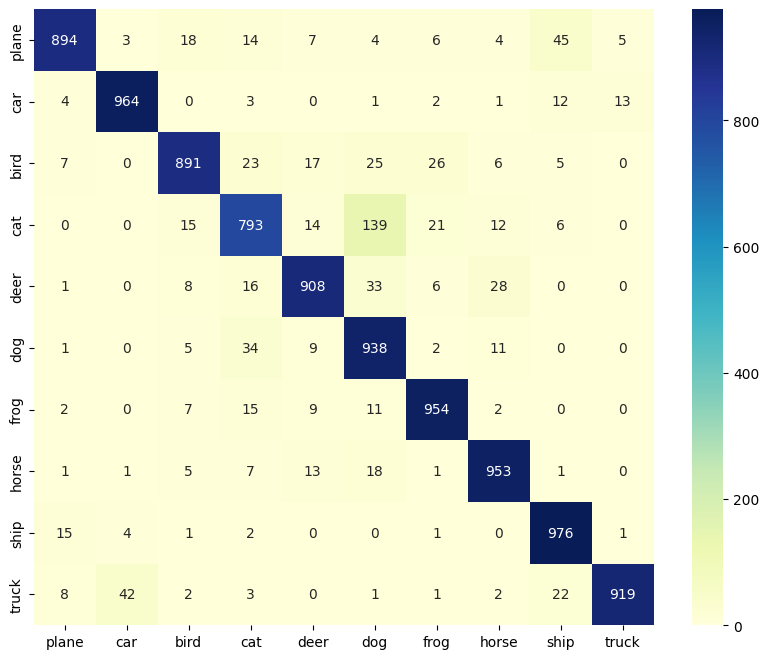

In [12]:
heatmap = pd.DataFrame(data=0,index=classes,columns=classes)
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(batch_size):
            true_label = labels[i].item()
            predicted_label = predicted[i].item()
            heatmap.iloc[true_label,predicted_label] += 1
_, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(heatmap, annot=True, fmt="d",cmap="YlGnBu")
plt.show()

In [13]:
torch.save(
  model, 
  'C:/Users/Richard_Z/Desktop/data/result1106.pth')

In [14]:
torch.save(
  model, 
  'C:/Users/Richard_Z/Desktop/data/result1106.h5')

In [15]:
from sklearn.metrics import confusion_matrix
import itertools

In [16]:
from datetime import datetime
# Test the model
start_time = datetime.now()
ytest = []
rtest = np.ones((0,10))
model.eval()  # eval mode (batchnorm uses moving mean/variance instead of mini-batch mean/variance)
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_loader:
        ytest = np.append(ytest, labels)
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        rtest = np.append(rtest, outputs, axis=0)
print('Test Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))
print("Time Elapsed: {} seconds".format((datetime.now() - start_time).total_seconds()))

Test Accuracy of the model on the 10000 test images: 92.6 %
Time Elapsed: 47.797161 seconds


In [18]:
cfm = confusion_matrix(ytest, np.argmax (rtest,axis=1))
print(cfm)
print(cfm/1000)

[[906   4  13  11   6   5   3   3  45   4]
 [  5 973   0   1   0   1   2   0   7  11]
 [  6   0 889  23  18  22  25  11   6   0]
 [  1   0  13 807  13 126  22  14   4   0]
 [  1   0   8  13 925  25   6  22   0   0]
 [  1   0   4  33  10 942   2   8   0   0]
 [  2   0   8  11   4  12 959   1   3   0]
 [  1   1   3   3  12  19   2 959   0   0]
 [ 12   3   1   1   0   0   1   1 980   1]
 [  7  41   2   3   0   1   1   3  22 920]]
[[0.906 0.004 0.013 0.011 0.006 0.005 0.003 0.003 0.045 0.004]
 [0.005 0.973 0.    0.001 0.    0.001 0.002 0.    0.007 0.011]
 [0.006 0.    0.889 0.023 0.018 0.022 0.025 0.011 0.006 0.   ]
 [0.001 0.    0.013 0.807 0.013 0.126 0.022 0.014 0.004 0.   ]
 [0.001 0.    0.008 0.013 0.925 0.025 0.006 0.022 0.    0.   ]
 [0.001 0.    0.004 0.033 0.01  0.942 0.002 0.008 0.    0.   ]
 [0.002 0.    0.008 0.011 0.004 0.012 0.959 0.001 0.003 0.   ]
 [0.001 0.001 0.003 0.003 0.012 0.019 0.002 0.959 0.    0.   ]
 [0.012 0.003 0.001 0.001 0.    0.    0.001 0.001 0.98  0.001]
 [